# Impact de la guerre en Ukraine sur les conso, import et prix du pétrole en France

In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import random
import circlify

## Fonction importante

In [2]:
def scatter_plot_2lines(x1, y1, label_1, x_label, y_label, title, x2 = None, y2 = None, label_2 = None, save=False, path_to_save=''):
    '''
    Save or plot a 2 lines scatter plot 
    
    Input :
    x1 : pd.Series, X data for first line
    x2 : pd.Series, X data for second line
    y1 : pd.Series, Y data for first line
    y2 : pd.Series, Y data for second line
    label_1 : str, Name for first line
    label_2 : str, Name for second line
    x_label : str, Name for X axis
    y_label : str, Name for Y axis
    save : Bool, Allow to save or not the plot
    path_to_save : str, path where the plot will be stored
    
    Return :
    None
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x1, y=y1.astype(float), name=label_1))
    if isinstance(y2, pd.Series) == True:
        fig.add_trace(go.Scatter(x=x2, y=y2.astype(float), name=label_2))

    fig.add_vrect(x0='2020-03-11', x1='2022-02-24', line_width=0, fillcolor="red", opacity=0.1, annotation_text='Crise liée au COVID-19', annotation_position='inside top left')
    fig.add_vrect(x0='2022-02-24', x1='2022-12-31', line_width=0, fillcolor="blue", opacity=0.1, annotation_text='Guerre en Ukraine', annotation_position='inside top left')
    fig.update_layout(title_text=title, title_x=0.5, legend_title_text = "Légende :", width=800, height=400, template='plotly_white')
    fig.update_xaxes(title_text=x_label, showgrid=False, showline = True, linecolor = '#000000')
    fig.update_yaxes(title_text=y_label, showgrid=False, showline = True, linecolor = '#000000')
    if isinstance(y2, pd.Series) == True:
        max_val = max(max(y1), max(y2))
    else:
        max_val = max(y1)
    
    max_val = max_val+max_val*0.10
    fig.update_layout(yaxis=dict(range=[0, max_val]))
    if not save:
        fig.show()
    if save:
        fig.write_image(path_to_save)

## Exploration des données

### Conso, import, export

In [3]:
def read_petrole_data(date_debut, date_fin):
    df_list = list()
    for file in os.listdir('Data/'):        #print('---------------------------',file, '-------------------------') 
        if 'Petrole' in file:
            print(file)
            df = pd.read_csv('Data/'+file,delimiter=';')
            df = df.iloc[1:]
            df['Période']= pd.to_datetime(df['Période'], format='%Y-%m-%d ')
            df = df.set_index('Période')
            df = df[df.columns].astype(float)
            df = df.loc[date_debut : date_fin]
            df_list.append(df)
    print(len(df_list))
    return df_list

In [4]:
df_list = read_petrole_data('2018-01-01', '2023-01-01')

4.4.-Synthese-Petrole.2023-04.csv
2.1.-Prix-industriels-Petrole.2023-04.csv
3.3.Petrole.2023-04.csv
1.1.-Prix-menages-Petrole.2023-04.csv
4


In [5]:
## Prix industriels
df_list[1].head()

Prix au détail d'une tonne FOL HTS  \
Période                                          
2021-12-01                                 NaN   
2020-03-01                                 NaN   
2021-09-01                                 NaN   
2021-05-01                                 NaN   
2020-08-01                                 NaN   

            Prix au détail d'une tonne FOL BTS  \
Période                                          
2021-12-01                                 NaN   
2020-03-01                                 NaN   
2021-09-01                                 NaN   
2021-05-01                                 NaN   
2020-08-01                                 NaN   

            Prix au détail d'une tonne OL TBTS  \
Période                                          
2021-12-01                            650.6000   
2020-03-01                            414.1880   
2021-09-01                            622.8525   
2021-05-01                            563.5330   
2020-08-01                            454.4030   

            Prix au détail de 100 kWh PCI de FOL HTS  \
Période                                                
2021-12-01                                       NaN   
2020-03-01                                       NaN   
2021-09-01                                       NaN   
2021-05-01                                       NaN   
2020-08-01                                       NaN   

            Prix au détail de 100 kWh PCI de FOL BTS  \
Période                                                
2021-12-01                                       NaN   
2020-03-01                                       NaN   
2021-09-01                                       NaN   
2021-05-01                                       NaN   
2020-08-01                                       NaN   

            Prix au détail de 100 kWh PCI de FOL TBTS  
Période                                                
2021-12-01                                     5.8718  
2020-03-01                                     3.7382  
2021-09-01                                     5.6214  
2021-05-01                                     5.0860  
2020-08-01                                     4.1011

In [6]:
## Synthèse pétrole
df_list[0].head()

1. Production de pétrole (en GWh)  \
Période                                         
2022-07-01                            560.082   
2022-10-01                            557.195   
2019-11-01                            717.652   
2021-05-01                            662.733   
2021-06-01                            639.352   

            2. Solde importateur (importations - exportations) tous produits pétroliers (en GWh)  \
Période                                                                                            
2022-07-01                                          73057.618                                      
2022-10-01                                          73363.349                                      
2019-11-01                                          69321.180                                      
2021-05-01                                          63910.446                                      
2021-06-01                                          66366.403                                      

            2.1 Importations de tous produits pétroliers (en GWh)  \
Période                                                             
2022-07-01                                          86313.328       
2022-10-01                                          82922.651       
2019-11-01                                          83638.258       
2021-05-01                                          72906.983       
2021-06-01                                          75393.179       

            2.1.1 Importations de pétrole brut, condensats et autres produits à distiller (en GWh)  \
Période                                                                                              
2022-07-01                                          46129.023                                        
2022-10-01                                          28482.614                                        
2019-11-01                                          37576.949                                        
2021-05-01                                          28836.097                                        
2021-06-01                                          34639.269                                        

            2.1.2 Importations de produits pétroliers raffinés (en GWh)  \
Période                                                                   
2022-07-01                                          40184.305             
2022-10-01                                          54440.037             
2019-11-01                                          46061.309             
2021-05-01                                          44070.887             
2021-06-01                                          40753.910             

            2.2 Exportations de produits pétroliers raffinés (en GWh)  \
Période                                                                 
2022-07-01                                          13255.710           
2022-10-01                                           9559.303           
2019-11-01                                          14317.078           
2021-05-01                                           8996.537           
2021-06-01                                           9026.776           

            3. Solde importateur (importations - exportations) de produits pétroliers raffinés (en GWh)  \
Période                                                                                                   
2022-07-01                                          26928.595                                             
2022-10-01                                          44880.734                                             
2019-11-01                                          31744.231                                             
2021-05-01                                          35074.350                                             
2021-06-01                                          31727.134                           

In [7]:
## Pétrole
df_list[2].head()

1. Production de pétrole (brut et hydrocarbures extraits du gaz naturel en kt)  \
Période                                                                                      
2019-07-01                                             51.300                                
2021-07-01                                             55.084                                
2023-01-01                                             49.969                                
2022-07-01                                             48.158                                
2022-02-01                                             48.460                                

            1.1 Production de pétrole brut (en kt)  \
Période                                              
2019-07-01                                  51.300   
2021-07-01                                  55.084   
2023-01-01                                  49.969   
2022-07-01                                  48.158   
2022-02-01                                  48.460   

            1.2 Production d'hydrocarbures extraits du gaz naturel (en kt)  \
Période                                                                      
2019-07-01                                                0.0                
2021-07-01                                                0.0                
2023-01-01                                                0.0                
2022-07-01                                                0.0                
2022-02-01                                                0.0                

            2. Solde importateur (importations - exportations) tous produits pétroliers (en kt)  \
Période                                                                                           
2019-07-01                                           6703.383                                     
2021-07-01                                           5641.868                                     
2023-01-01                                           6288.736                                     
2022-07-01                                           6281.824                                     
2022-02-01                                           5211.246                                     

            2.1 Importations totales de produits pétroliers (en kt)  \
Période                                                               
2019-07-01                                           7981.905         
2021-07-01                                           6571.721         
2023-01-01                                           7266.098         
2022-07-01                                           7421.610         
2022-02-01                                           6017.790         

            2.1.1 Importations de pétrole brut et condensats (en kt)  \
Période                                                                
2019-07-01                                           4294.461          
2021-07-01                                           3432.703          
2023-01-01                                           4086.000          
2022-07-01                                           3966.382          
2022-02-01                                           3101.502          

            2.1.2 Importations d'autres produits à distiller (APD) (en kt)  \
Période                                                                      
2019-07-01                                                0.0                
2021-07-01                                                0.0                
2023-01-01                                                0.0                
2022-07-01                                                0.0                
2022-02-01                                                0.0                

            2.1.3 Importations de produits pétroliers raffinés (en kt)  \
Période                                                                  
2019-07-01                         

In [8]:
df_list[2].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-07-01 to 2022-08-01
Data columns (total 45 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   1. Production de pétrole (brut et hydrocarbures extraits du gaz naturel en kt)                                                                   61 non-null     float64
 1   1.1 Production de pétrole brut (en kt)                                                                                                           61 non-null     float64
 2   1.2 Production d'hydrocarbures extraits du gaz naturel (en kt)                                                                                   61 non-null     float64
 3   2.

In [9]:
df_list[2].columns

Index(['1. Production de pétrole (brut et hydrocarbures extraits du gaz naturel en kt)',
       '1.1 Production de pétrole brut (en kt)',
       '1.2 Production d'hydrocarbures extraits du gaz naturel (en kt)',
       '2. Solde importateur (importations - exportations) tous produits pétroliers (en kt)',
       '2.1 Importations totales de produits pétroliers (en kt)',
       '2.1.1 Importations de pétrole brut et condensats (en kt)',
       '2.1.2 Importations d'autres produits à distiller (APD) (en kt)',
       '2.1.3 Importations de produits pétroliers raffinés (en kt)',
       '2.2 Exportations de produits pétroliers raffinés (en kt)',
       '3. Marché des soutes maritimes (françaises et étrangères) (en kt)',
       '5. Consommation totale de produits pétroliers nette de l'autoconsommation des raffineries  (en kt)',
       '5.1 Ventes totales de fioul lourd (FOL) (en kt)',
       '5.1.1 Ventes de fioul lourd (FOL) à l'industrie (en kt)',
       '5.1.2 Ventes de fioul lourd (FOL) au

In [10]:
## Prix ménages
df_list[3].head()

Tarif d'une tonne de propane en citerne  \
Période                                               
2020-11-01                                      NaN   
2021-09-01                                      NaN   
2022-12-01                                      NaN   
2021-08-01                                      NaN   
2019-10-01                                      NaN   

            Prix au détail de 100 kWh PCI de propane en citerne  \
Période                                                           
2020-11-01                                                NaN     
2021-09-01                                                NaN     
2022-12-01                                                NaN     
2021-08-01                                                NaN     
2019-10-01                                                NaN     

            Prix d'une tonne de propane  \
Période                                   
2020-11-01                    1851.0749   
2021-09-01                    2082.5521   
2022-12-01                    2052.8569   
2021-08-01                    1808.0997   
2019-10-01                    1910.1409   

            Prix au détail de 100 kWh PCS de propane  \
Période                                                
2020-11-01                                   13.4136   
2021-09-01                                   15.0910   
2022-12-01                                   14.8758   
2021-08-01                                   13.1022   
2019-10-01                                   13.8416   

            Prix au détail de 100 kWh PCI de propane  \
Période                                                
2020-11-01                                   14.4842   
2021-09-01                                   16.2954   
2022-12-01                                   16.0631   
2021-08-01                                   14.1479   
2019-10-01                                   14.9463   

            Prix au détail d'une bouteille de butane de 13 kg  \
Période                                                         
2020-11-01                                                NaN   
2021-09-01                                              35.43   
2022-12-01                                              40.28   
2021-08-01                                              35.15   
2019-10-01                                              34.67   

            Prix au détail de 100 litres de FOD au tarif C1  \
Période                                                       
2020-11-01                                          70.7000   
2021-09-01                                          91.3525   
2022-12-01                                         133.8720   
2021-08-01                                          89.1025   
2019-10-01                                          92.8000   

            Prix au détail de 10 kWh PCI de FOD au tarif C1  \
Période                                                       
2020-11-01                                           7.1328   
2021-09-01                                           9.2164   
2022-12-01                                          13.5061   
2021-08-01                                           8.9894   
2019-10-01                                           9.3624   

            Prix au détail d'un litre d'essence ordinaire  \
Période                                                     
2020-11-01                                            NaN   
2021-09-01                                            NaN   
2022-12-01                                            NaN   
2021-08-01                                            NaN   
2019-10-01                                            NaN   

            Prix au détail d'un litre de super carburant ARS  \
Période                                                        
2020-11-01                                               NaN   
2021-09-01                                               NaN   
2022-12-01                                  

In [11]:
df_list[3] = df_list[3].sort_index()
df_list[2] = df_list[2].sort_index()
df_list[1] = df_list[1].sort_index()
df_list[0] = df_list[0].sort_index()

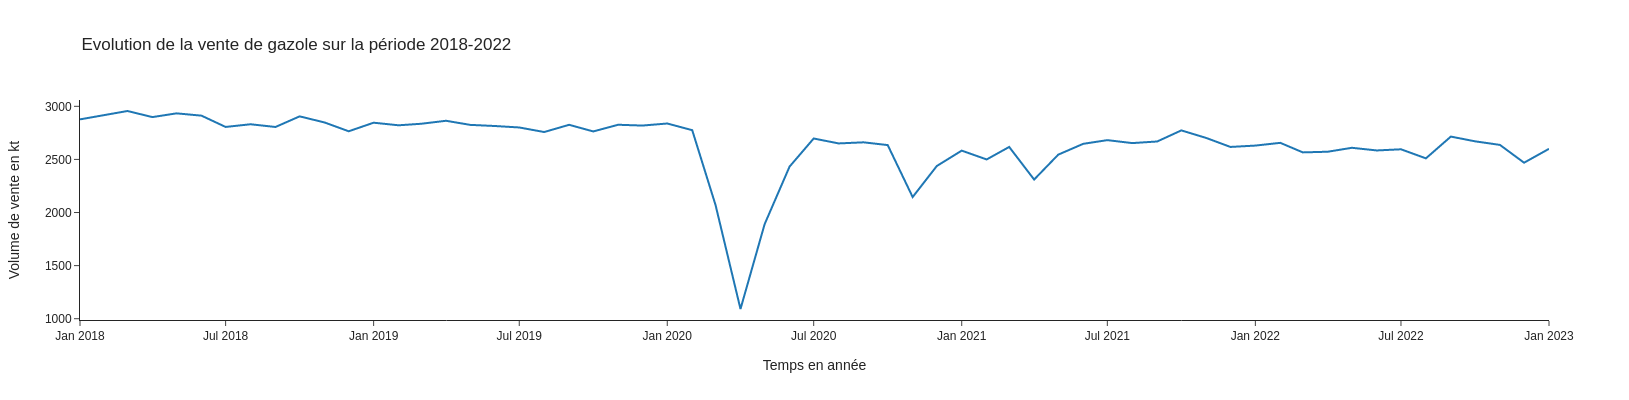

In [12]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df_list[1].index, y=df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].astype(float), name='Prix FOL TBTS'))
fig.add_trace(go.Scatter(x=df_list[3].index, y=df_list[2]["7.3 Ventes de gazole CVS-CVC-CJO (en kt)"], name='Vente de gazole en kt'))
fig.update_layout(title_text="Evolution de la vente de gazole sur la période 2018-2022", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Temps en année')
fig.update_yaxes(title_text='Volume de vente en kt')
fig.show()

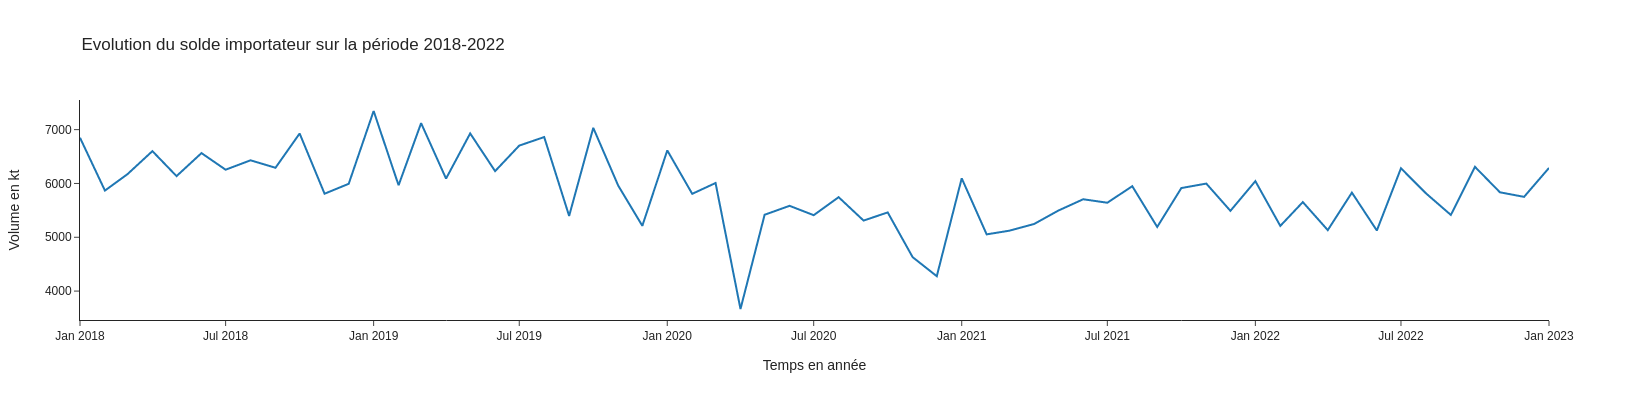

In [13]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df_list[1].index, y=df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].astype(float), name='Prix FOL TBTS'))
fig.add_trace(go.Scatter(x=df_list[3].index, y=df_list[2]["2. Solde importateur (importations - exportations) tous produits pétroliers (en kt)"], name='Solde importateur en kt'))
fig.update_layout(title_text="Evolution du solde importateur sur la période 2018-2022", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Temps en année')
fig.update_yaxes(title_text='Volume en kt')
fig.show()

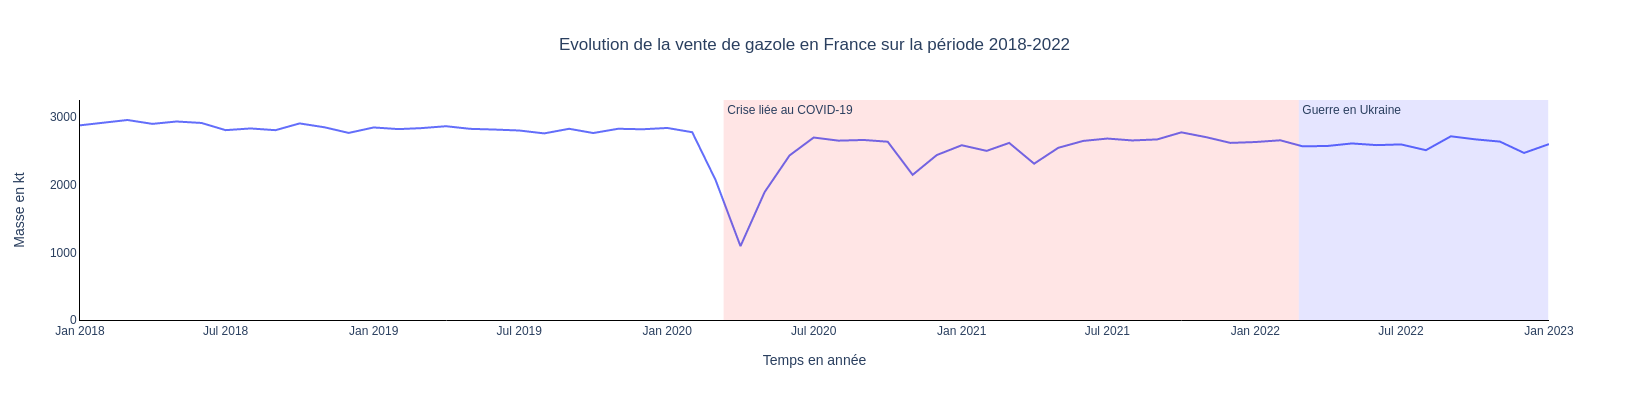

In [14]:
scatter_plot_2lines(x1 = df_list[2].index, y1 = df_list[2]["7.3 Ventes de gazole CVS-CVC-CJO (en kt)"], label_1 = 'Vente de gazole en kt', x_label = 'Temps en année',
                    y_label = 'Masse en kt', title = "Evolution de la vente de gazole en France sur la période 2018-2022")

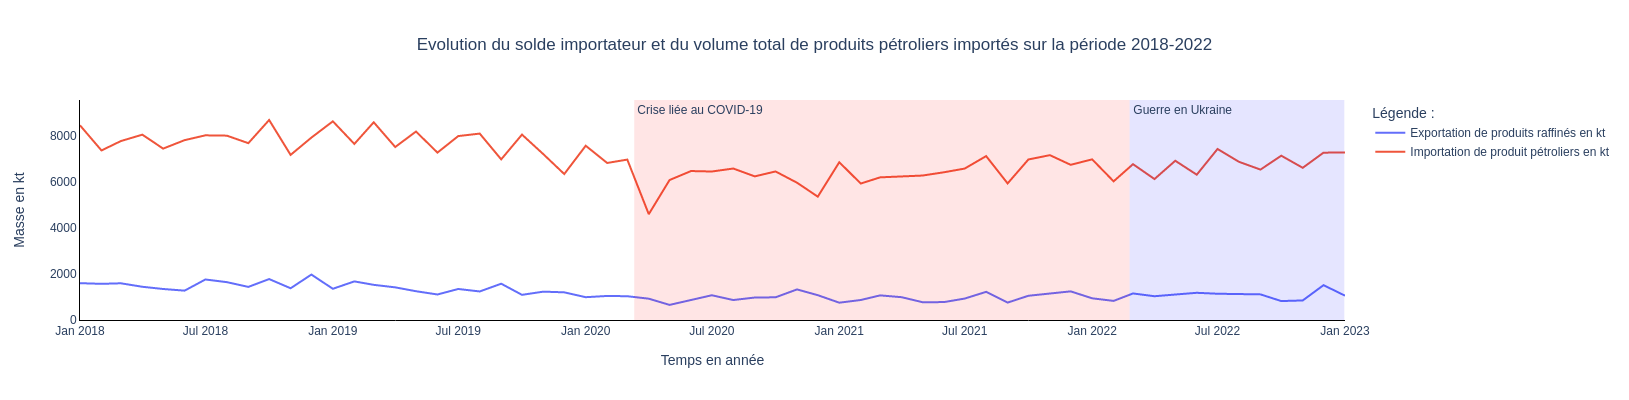

In [15]:
scatter_plot_2lines(x1 = df_list[2].index, y1 = df_list[2]["2.2 Exportations de produits pétroliers raffinés (en kt)"], x2 = df_list[2].index,
                    y2 = df_list[2]["2.1 Importations totales de produits pétroliers (en kt)"], label_1 = 'Exportation de produits raffinés en kt', label_2 = 'Importation de produit pétroliers en kt', x_label = 'Temps en année',
                    y_label = 'Masse en kt', title = "Evolution du solde importateur et du volume total de produits pétroliers importés sur la période 2018-2022")

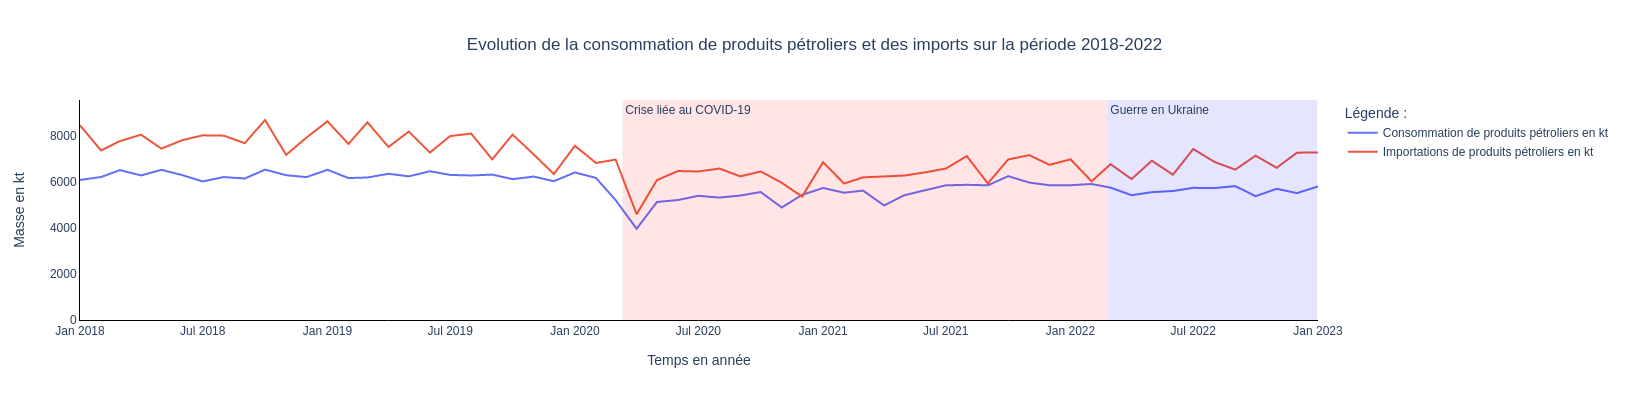

In [16]:
scatter_plot_2lines(x1 = df_list[2].index, y1 = df_list[2]["7. Consommation totale de produits pétroliers CVS-CVC-CJO (en kt)"], x2 = df_list[2].index,
                    y2 = df_list[2]["2.1 Importations totales de produits pétroliers (en kt)"], label_1 = 'Consommation de produits pétroliers en kt', label_2 = 'Importations de produits pétroliers en kt', x_label = 'Temps en année',
                    y_label = 'Masse en kt', title = "Evolution de la consommation de produits pétroliers et des imports sur la période 2018-2022")

In [17]:
df_list[0].columns

Index(['1. Production de pétrole (en GWh)',
       '2. Solde importateur (importations - exportations) tous produits pétroliers (en GWh)',
       '2.1 Importations de tous produits pétroliers (en GWh)',
       '2.1.1 Importations de pétrole brut, condensats et autres produits à distiller (en GWh)',
       '2.1.2 Importations de produits pétroliers raffinés (en GWh)',
       '2.2 Exportations de produits pétroliers raffinés (en GWh)',
       '3. Solde importateur (importations - exportations) de produits pétroliers raffinés (en GWh)',
       '4. Marché des soutes maritimes (françaises et étrangères) (en GWh)',
       '5. Consommation réelle de pétrole (brut et raffiné) (en GWh)',
       '6. Consommation de pétrole (brut et raffiné) CVC-CJO (en GWh)',
       '7. Consommation de pétrole (brut et raffiné) CVS-CVC-CJO (en GWh)',
       '8. Degrés jours unifiés mensuels en France, pour la période de chauffe (vaut 0 de juin à septembre, en °C)',
       '9. Indice de rigueur climatique pour la

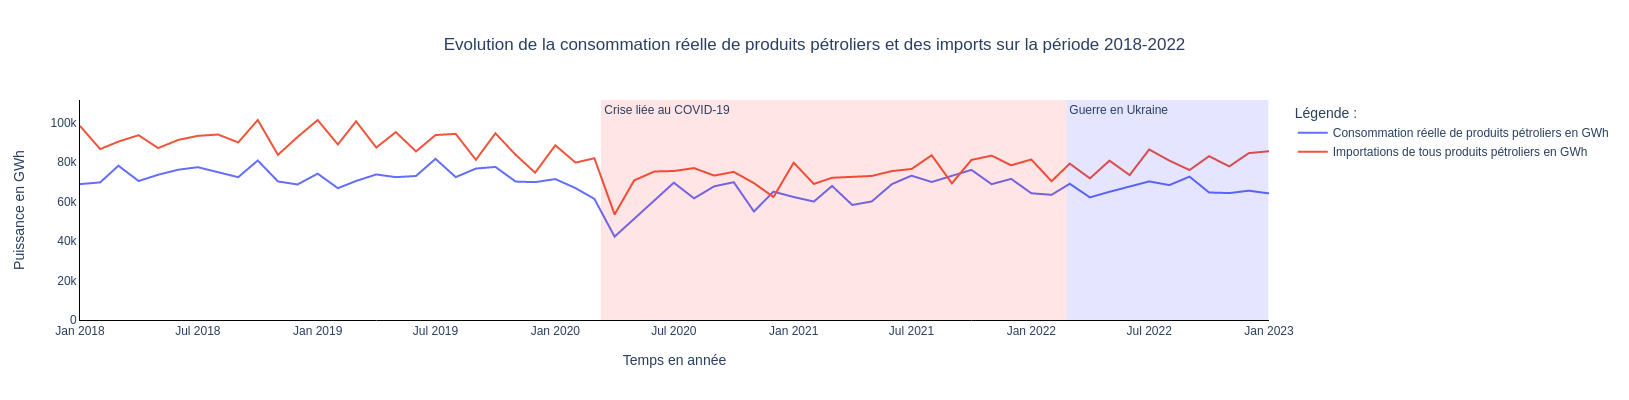

In [18]:
scatter_plot_2lines(x1 = df_list[0].index, y1 = df_list[0]["5. Consommation réelle de pétrole (brut et raffiné) (en GWh)"], x2 = df_list[0].index,
                    y2 = df_list[0]["2.1 Importations de tous produits pétroliers (en GWh)"], label_1 = 'Consommation réelle de produits pétroliers en GWh', label_2 = 'Importations de tous produits pétroliers en GWh', x_label = 'Temps en année',
                    y_label = 'Puissance en GWh', title = "Evolution de la consommation réelle de produits pétroliers et des imports sur la période 2018-2022")

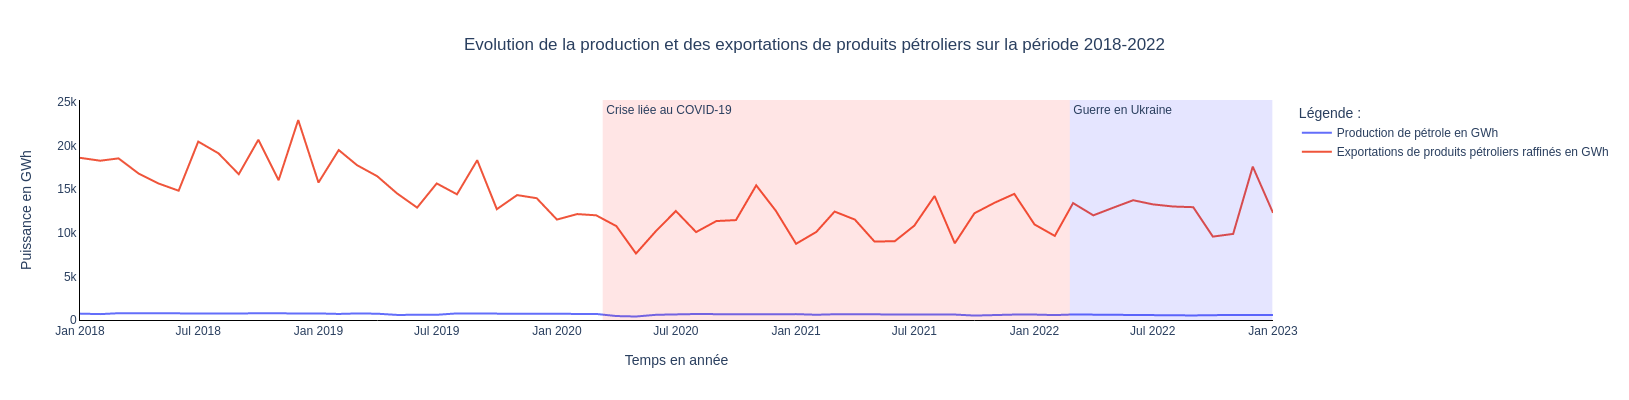

In [19]:
scatter_plot_2lines(x1 = df_list[0].index, y1 = df_list[0]["1. Production de pétrole (en GWh)"], x2 = df_list[0].index,
                    y2 = df_list[0]["2.2 Exportations de produits pétroliers raffinés (en GWh)"], label_1 = 'Production de pétrole en GWh', label_2 = 'Exportations de produits pétroliers raffinés en GWh', x_label = 'Temps en année',
                    y_label = 'Puissance en GWh', title = "Evolution de la production et des exportations de produits pétroliers sur la période 2018-2022")

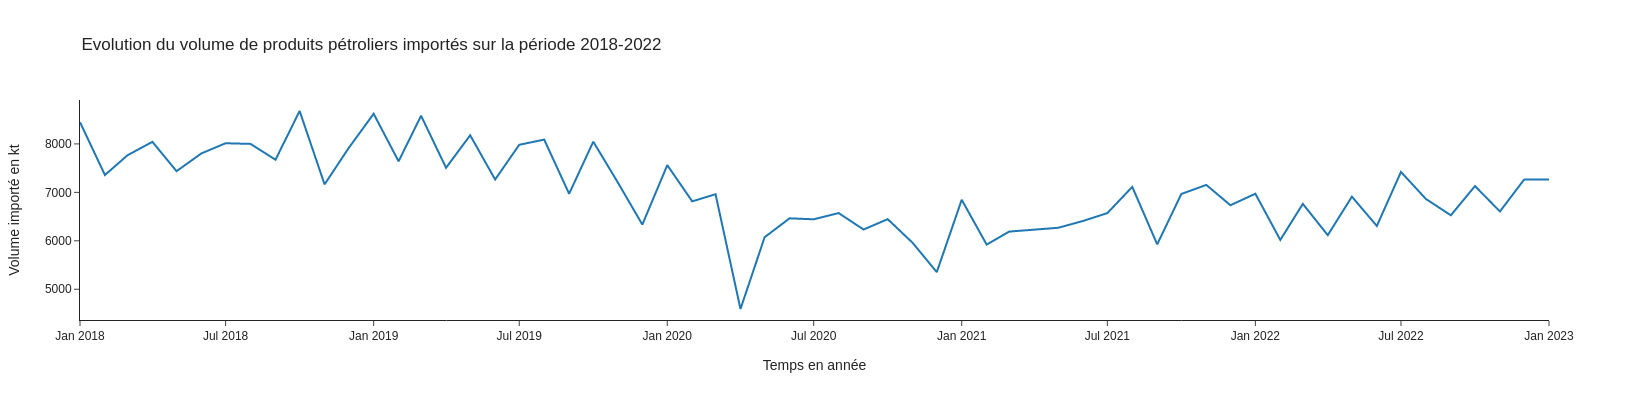

In [20]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df_list[1].index, y=df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].astype(float), name='Prix FOL TBTS'))
fig.add_trace(go.Scatter(x=df_list[3].index, y=df_list[2]["2.1 Importations totales de produits pétroliers (en kt)"], name='Importation de produit pétroliers en kt'))
fig.update_layout(title_text="Evolution du volume de produits pétroliers importés sur la période 2018-2022", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Temps en année')
fig.update_yaxes(title_text='Volume importé en kt')
fig.show()

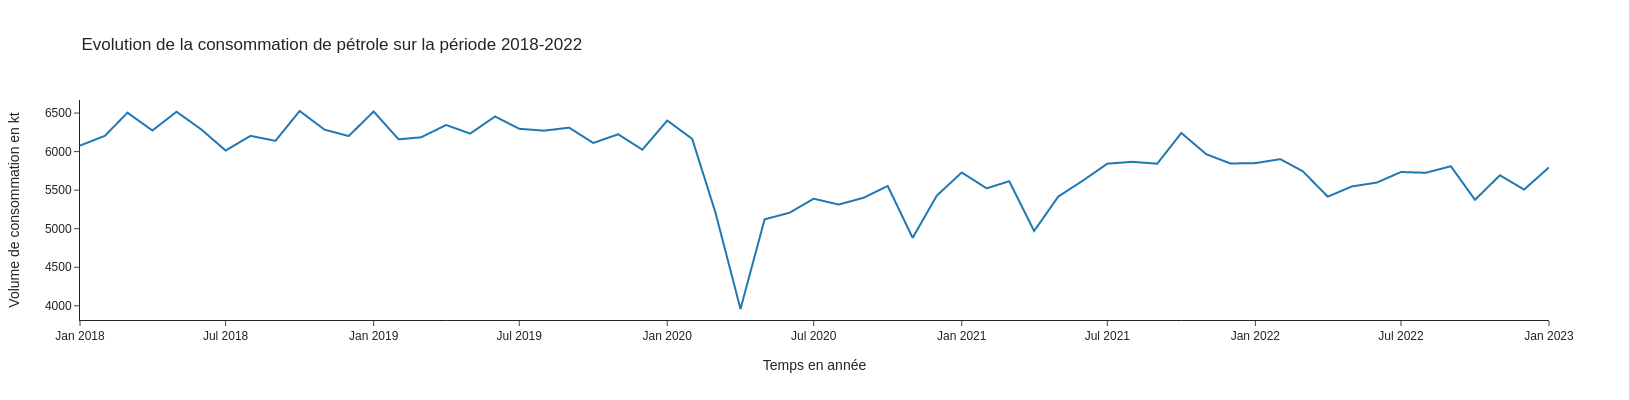

In [21]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df_list[1].index, y=df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].astype(float), name='Prix FOL TBTS'))
fig.add_trace(go.Scatter(x=df_list[3].index, y=df_list[2]["7. Consommation totale de produits pétroliers CVS-CVC-CJO (en kt)"], name='Consommation de pétrole en kt'))
fig.update_layout(title_text="Evolution de la consommation de pétrole sur la période 2018-2022", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Temps en année')
fig.update_yaxes(title_text='Volume de consommation en kt')
fig.show()

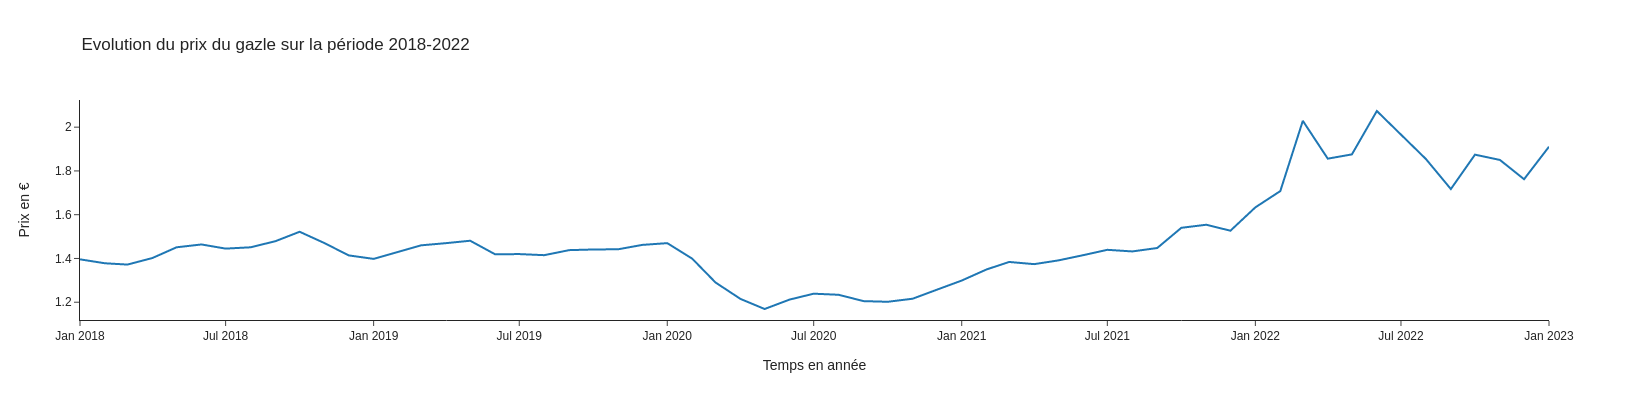

In [22]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df_list[1].index, y=df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].astype(float), name='Prix FOL TBTS'))
fig.add_trace(go.Scatter(x=df_list[3].index, y=df_list[3]["Prix au détail d'un litre de gazole"], name='Prix du litre de gazole'))
fig.update_layout(title_text="Evolution du prix du gazle sur la période 2018-2022", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Temps en année')
fig.update_yaxes(title_text='Prix en €')
fig.show()

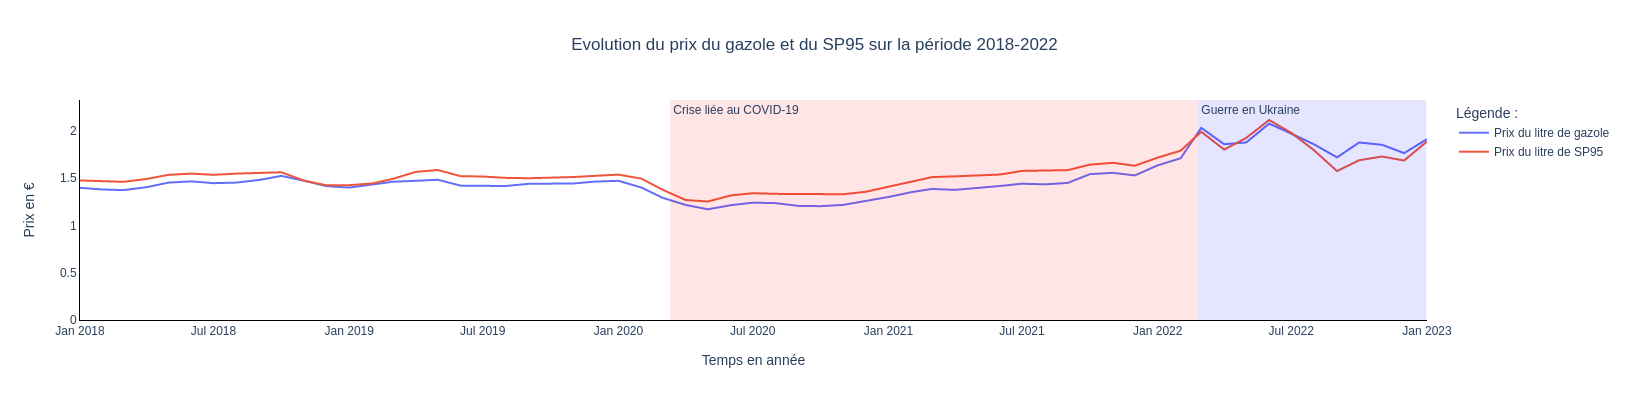

In [23]:
scatter_plot_2lines(x1 = df_list[3].index, y1 = df_list[3]["Prix au détail d'un litre de gazole"], label_1 = 'Prix du litre de gazole',
                    x2 = df_list[3].index, y2 = df_list[3]["Prix au détail d'un litre de super sans plomb 95"], label_2 = 'Prix du litre de SP95', x_label = 'Temps en année', y_label = 'Prix en €',
                    title = "Evolution du prix du gazole et du SP95 sur la période 2018-2022")

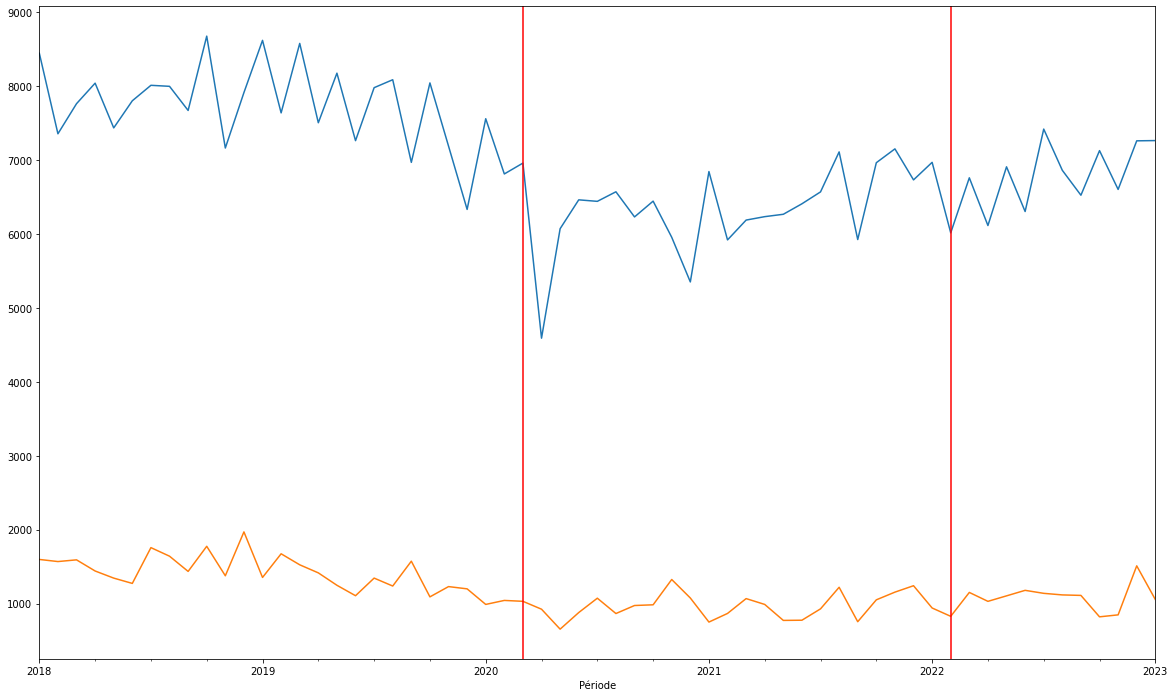

In [24]:
df_list[2]["2.1 Importations totales de produits pétroliers (en kt)"].plot(figsize = (20,12))
df_list[2]["2.2 Exportations de produits pétroliers raffinés (en kt)"].plot(figsize = (20,12))
plt.axvline(dt.datetime(2022, 2, 24), color = 'r')
plt.axvline(dt.datetime(2020, 3, 11), color = 'r')

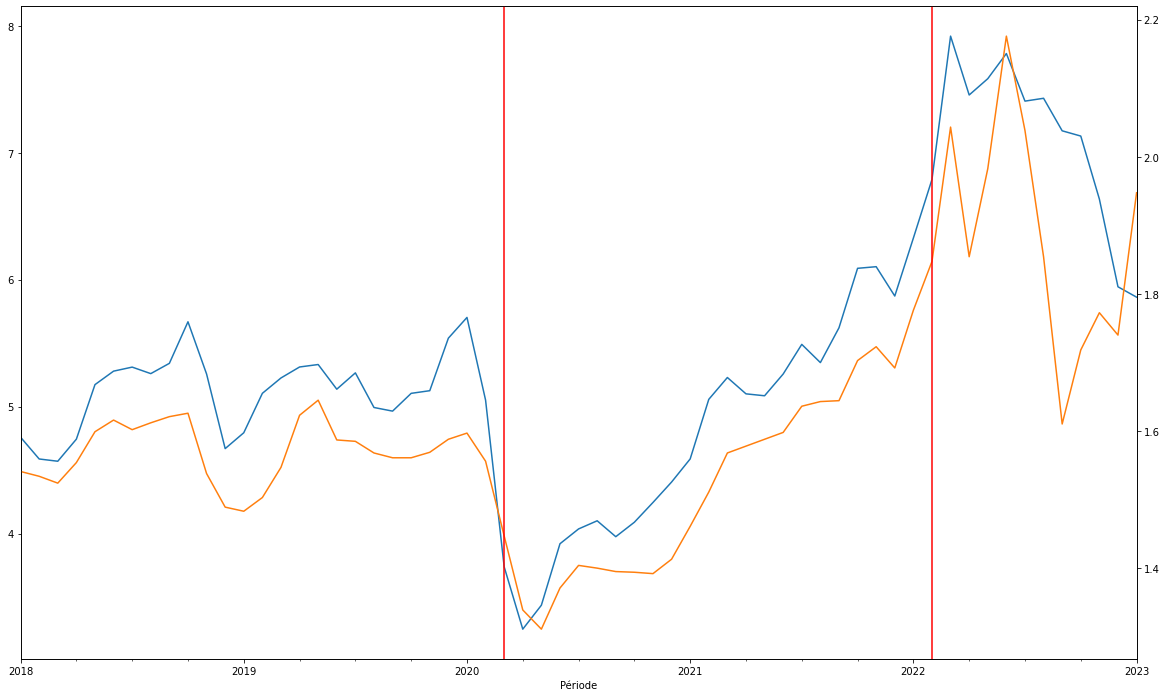

In [25]:
df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].plot(figsize = (20,12))
df_list[3]["Prix au détail d'un litre de super sans plomb 98"].plot(figsize = (20,12), secondary_y = True)
plt.axvline(dt.datetime(2022, 2, 24), color = 'r')
plt.axvline(dt.datetime(2020, 3, 11), color = 'r')

In [26]:
df_list[3]

Tarif d'une tonne de propane en citerne  \
Période                                               
2018-01-01                                      NaN   
2018-02-01                                      NaN   
2018-03-01                                      NaN   
2018-04-01                                      NaN   
2018-05-01                                      NaN   
...                                             ...   
2022-09-01                                      NaN   
2022-10-01                                      NaN   
2022-11-01                                      NaN   
2022-12-01                                      NaN   
2023-01-01                                      NaN   

            Prix au détail de 100 kWh PCI de propane en citerne  \
Période                                                           
2018-01-01                                                NaN     
2018-02-01                                                NaN     
2018-03-01                                                NaN     
2018-04-01                                                NaN     
2018-05-01                                                NaN     
...                                                       ...     
2022-09-01                                                NaN     
2022-10-01                                                NaN     
2022-11-01                                                NaN     
2022-12-01                                                NaN     
2023-01-01                                                NaN     

            Prix d'une tonne de propane  \
Période                                   
2018-01-01                    1779.9084   
2018-02-01                    1776.9197   
2018-03-01                    1804.5128   
2018-04-01                    1840.1891   
2018-05-01                    1822.5010   
...                                 ...   
2022-09-01                    1986.5249   
2022-10-01                    2073.5001   
2022-11-01                    2032.3137   
2022-12-01                    2052.8569   
2023-01-01                    2036.2491   

            Prix au détail de 100 kWh PCS de propane  \
Période                                                
2018-01-01                                   12.8979   
2018-02-01                                   12.8762   
2018-03-01                                   13.0762   
2018-04-01                                   13.3347   
2018-05-01                                   13.2065   
...                                              ...   
2022-09-01                                   14.3951   
2022-10-01                                   15.0254   
2022-11-01                                   14.7269   
2022-12-01                                   14.8758   
2023-01-01                                   14.7554   

            Prix au détail de 100 kWh PCI de propane  \
Période                                                
2018-01-01                                   13.9273   
2018-02-01                                   13.9039   
2018-03-01                                   14.1198   
2018-04-01                                   14.3990   
2018-05-01                                   14.2606   
...                                              ...   
2022-09-01                                   15.5440   
2022-10-01                                   16.2246   
2022-11-01                                   15.9023   
2022-12-01                                   16.0631   
2023-01-01                                   15.9331   

            Prix au détail d'une bouteille de butane de 13 kg  \
Période                                                         
2018-01-01                                              32.12   
2018-02-01                                              32.21   
2018-03-01                                              32.24   
2018-04-01                                              32.49   
2018-05-01      

### Provenance du pétrole importé

In [27]:
data_imp = pd.read_csv('../Data/Provenance_petrole.csv', sep = ';')
data_imp['Provenance'][data_imp['Provenance'] == 'Russie'] = 'Dont Russie'
data_imp['Provenance'][data_imp['Provenance'] == 'Arabie saoudite'] = 'Dont Arabie saoudite'
data_imp.head(10)

/tmp/ipykernel_5286/81859112.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5286/81859112.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Provenance  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
0               Afrique  18.8  20.9  19.4  19.8  20.4  16.2  15.7  17.7  16.2   
1          URSS/ex-URSS  23.4  18.4  16.9  15.1  16.1  17.0  19.6  16.8  14.3   
2           Dont Russie   9.6   8.3   6.8   5.4   4.7   5.8   8.9   7.6   6.2   
3          Moyen-Orient  12.2   9.8  11.9  12.9  14.3  14.0  14.0  12.6  10.2   
4  Dont Arabie saoudite   6.7   7.8  10.2  11.1  10.6   8.3   6.2   8.0   7.3   
5           Mer du Nord   9.7   6.8   7.4   6.5   5.7   6.6   7.0   4.1   3.7   
6                Autres   1.1   1.8   1.1   0.7   1.7   2.3   1.4   2.0   4.3   
7  Importations totales  65.1  57.6  56.7  54.9  58.3  56.0  57.8  53.3  48.7   

   2020  2021 (p)  2021 (p)\n(en %)  
0  10.1      12.6              37.1  
1   8.7       7.7              22.7  
2   2.9       3.0               8.8  
3   5.1       5.0              14.7  
4   3.9       2.6               7.7  
5   4.3       3.5              10.3  
6   4.9       5.2              15.2  
7  33.2      34.0             100.0

In [28]:
data_imp_prop = data_imp.T.rename(columns=data_imp.T.iloc[0]).iloc[1:-1]
for c in data_imp_prop.columns[:-1]:
    data_imp_prop[c] = data_imp_prop[c]/data_imp_prop['Importations totales']
data_imp_prop

Afrique URSS/ex-URSS Dont Russie Moyen-Orient Dont Arabie saoudite  \
2011      0.288786     0.359447    0.147465     0.187404             0.102919   
2012      0.362847     0.319444    0.144097     0.170139             0.135417   
2013      0.342152      0.29806    0.119929     0.209877             0.179894   
2014      0.360656     0.275046    0.098361     0.234973             0.202186   
2015      0.349914     0.276158    0.080617     0.245283             0.181818   
2016      0.289286     0.303571    0.103571         0.25             0.148214   
2017      0.271626       0.3391    0.153979     0.242215             0.107266   
2018      0.332083     0.315197    0.142589     0.236398             0.150094   
2019      0.332649     0.293634     0.12731     0.209446             0.149897   
2020      0.304217     0.262048    0.087349     0.153614              0.11747   
2021 (p)  0.370588     0.226471    0.088235     0.147059             0.076471   

         Mer du Nord    Autres Importations totales  
2011        0.149002  0.016897                 65.1  
2012        0.118056   0.03125                 57.6  
2013        0.130511    0.0194                 56.7  
2014        0.118397   0.01275                 54.9  
2015         0.09777   0.02916                 58.3  
2016        0.117857  0.041071                 56.0  
2017        0.121107  0.024221                 57.8  
2018        0.076923  0.037523                 53.3  
2019        0.075975  0.088296                 48.7  
2020        0.129518   0.14759                 33.2  
2021 (p)    0.102941  0.152941                 34.0

<Axes: >

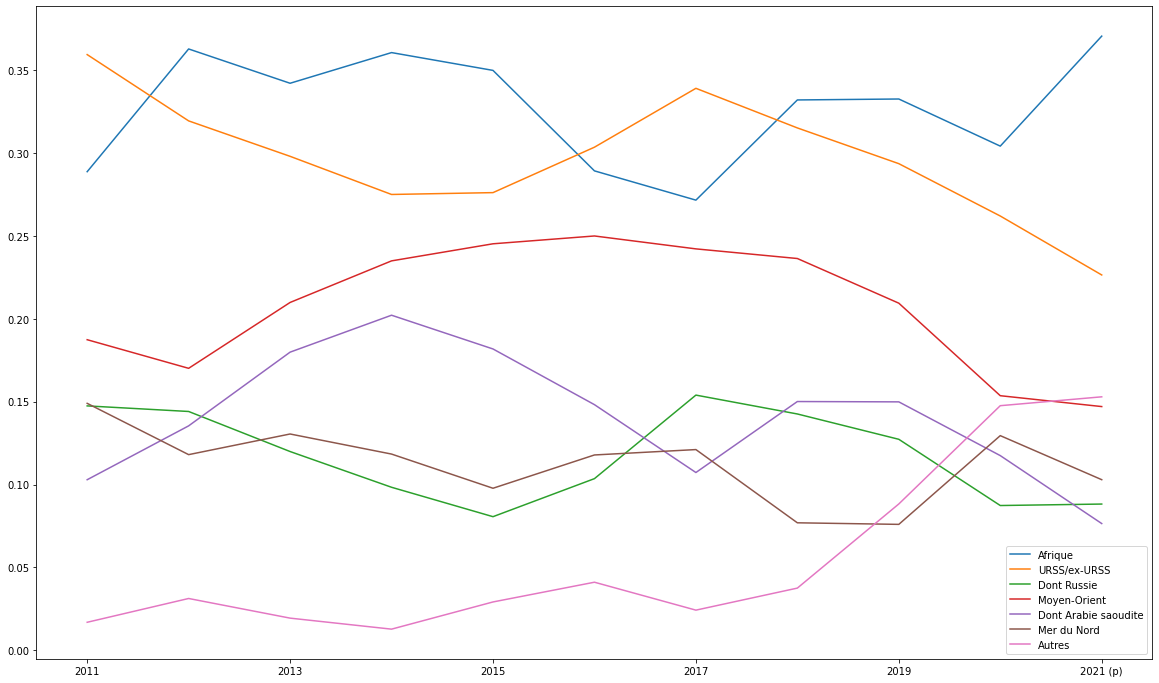

In [29]:
data_imp_prop.iloc[:, :-1].plot(figsize = (20,12))

In [30]:
data_imp_prop

Afrique URSS/ex-URSS Dont Russie Moyen-Orient Dont Arabie saoudite  \
2011      0.288786     0.359447    0.147465     0.187404             0.102919   
2012      0.362847     0.319444    0.144097     0.170139             0.135417   
2013      0.342152      0.29806    0.119929     0.209877             0.179894   
2014      0.360656     0.275046    0.098361     0.234973             0.202186   
2015      0.349914     0.276158    0.080617     0.245283             0.181818   
2016      0.289286     0.303571    0.103571         0.25             0.148214   
2017      0.271626       0.3391    0.153979     0.242215             0.107266   
2018      0.332083     0.315197    0.142589     0.236398             0.150094   
2019      0.332649     0.293634     0.12731     0.209446             0.149897   
2020      0.304217     0.262048    0.087349     0.153614              0.11747   
2021 (p)  0.370588     0.226471    0.088235     0.147059             0.076471   

         Mer du Nord    Autres Importations totales  
2011        0.149002  0.016897                 65.1  
2012        0.118056   0.03125                 57.6  
2013        0.130511    0.0194                 56.7  
2014        0.118397   0.01275                 54.9  
2015         0.09777   0.02916                 58.3  
2016        0.117857  0.041071                 56.0  
2017        0.121107  0.024221                 57.8  
2018        0.076923  0.037523                 53.3  
2019        0.075975  0.088296                 48.7  
2020        0.129518   0.14759                 33.2  
2021 (p)    0.102941  0.152941                 34.0

In [31]:
data_imp_prop = data_imp_prop[data_imp_prop.columns[:-1]].T
data_imp_prop

2011      2012      2013      2014      2015  \
Afrique               0.288786  0.362847  0.342152  0.360656  0.349914   
URSS/ex-URSS          0.359447  0.319444   0.29806  0.275046  0.276158   
Dont Russie           0.147465  0.144097  0.119929  0.098361  0.080617   
Moyen-Orient          0.187404  0.170139  0.209877  0.234973  0.245283   
Dont Arabie saoudite  0.102919  0.135417  0.179894  0.202186  0.181818   
Mer du Nord           0.149002  0.118056  0.130511  0.118397   0.09777   
Autres                0.016897   0.03125    0.0194   0.01275   0.02916   

                          2016      2017      2018      2019      2020  \
Afrique               0.289286  0.271626  0.332083  0.332649  0.304217   
URSS/ex-URSS          0.303571    0.3391  0.315197  0.293634  0.262048   
Dont Russie           0.103571  0.153979  0.142589   0.12731  0.087349   
Moyen-Orient              0.25  0.242215  0.236398  0.209446  0.153614   
Dont Arabie saoudite  0.148214  0.107266  0.150094  0.149897   0.11747   
Mer du Nord           0.117857  0.121107  0.076923  0.075975  0.129518   
Autres                0.041071  0.024221  0.037523  0.088296   0.14759   

                      2021 (p)  
Afrique               0.370588  
URSS/ex-URSS          0.226471  
Dont Russie           0.088235  
Moyen-Orient          0.147059  
Dont Arabie saoudite  0.076471  
Mer du Nord           0.102941  
Autres                0.152941

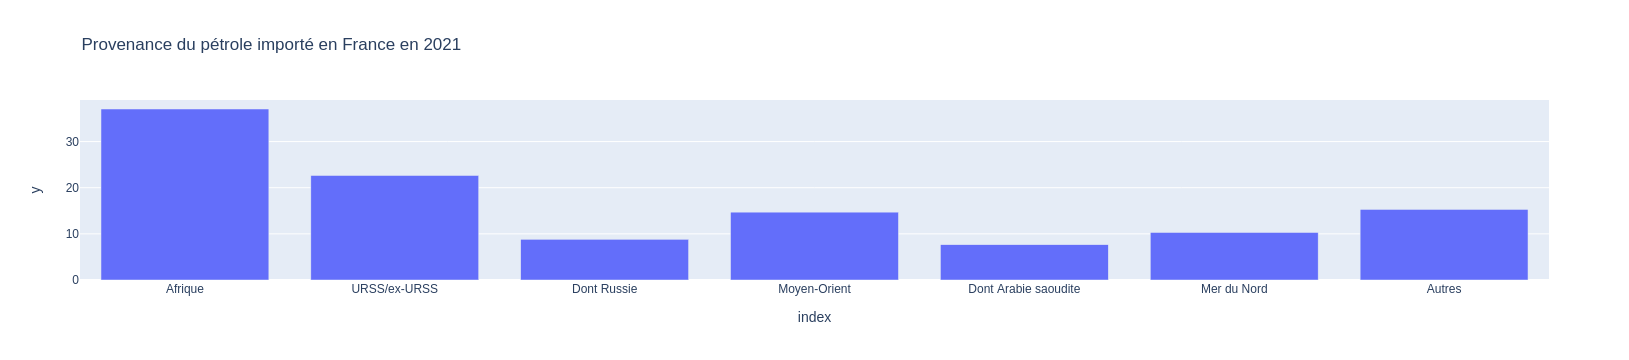

In [32]:
fig = px.bar(data_imp_prop, x=data_imp_prop.index, y=data_imp_prop['2021 (p)']*100, title="Provenance du pétrole importé en France en 2021")
fig.show()

In [71]:
def barchart(df, year1, year2, name1, name2, title, x_label, y_label):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df.index,
        y=df[year1]*100,
        name=name1,
        marker_color='indianred'
    ))
    fig.add_trace(go.Bar(
        x=df.index,
        y=df[year2]*100,
        name=name2,
        marker_color='lightsalmon'
    ))

    fig.update_layout(title_text=title, legend_title_text = "Légende :", width=800, height=400, template='simple_white')
    fig.update_xaxes(title_text=x_label)
    fig.update_yaxes(title_text=y_label)

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(barmode='group', xaxis_tickangle=-45)
    fig.show()

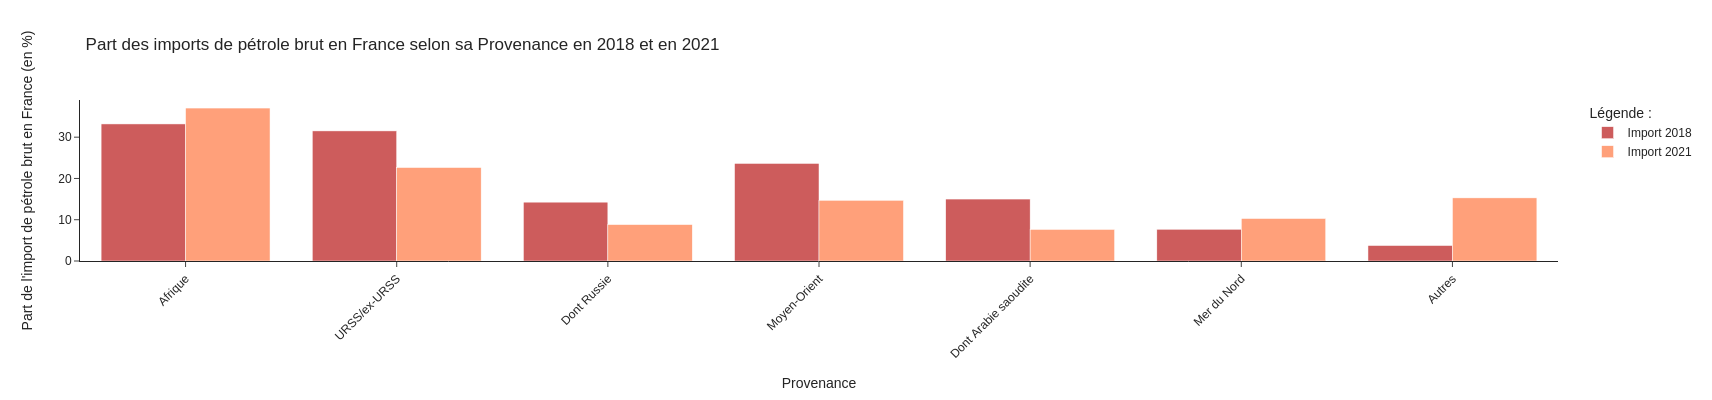

In [73]:
barchart(data_imp_prop, '2018', '2021 (p)', 'Import 2018', 'Import 2021', "Part des imports de pétrole brut en France selon sa Provenance en 2018 et en 2021", 'Provenance', "Part de l'import de pétrole brut en France (en %)")

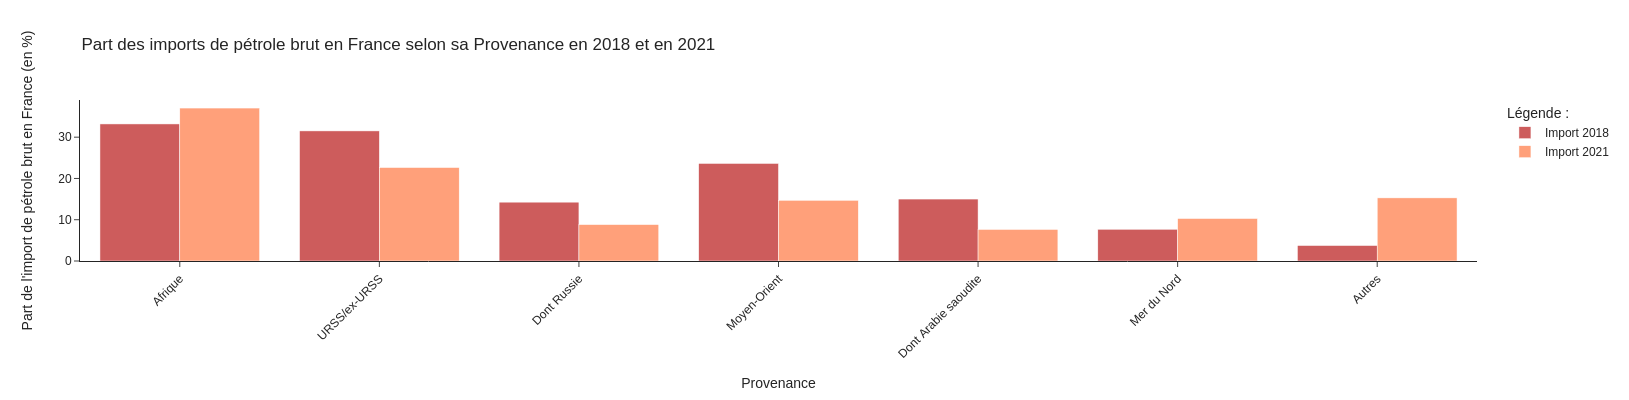

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data_imp_prop.index,
    y=data_imp_prop['2018']*100,
    name='Import 2018',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data_imp_prop.index,
    y=data_imp_prop['2021 (p)']*100,
    name='Import 2021',
    marker_color='lightsalmon'
))

fig.update_layout(title_text="Part des imports de pétrole brut en France selon sa Provenance en 2018 et en 2021", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Provenance')
fig.update_yaxes(title_text="Part de l'import de pétrole brut en France (en %)")

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### Production pétrole brut monde

In [34]:
data_prod = pd.read_csv('../Data/Production_petrole_monde.csv', sep = ',')
data_prod

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME       Value  \
0           AUS   OILPROD     TOT    KTOE         A  2000  25081.1572   
1           AUS   OILPROD     TOT    KTOE         A  2001  26611.8285   
2           AUS   OILPROD     TOT    KTOE         A  2002  30307.7115   
3           AUS   OILPROD     TOT    KTOE         A  2003  29403.1762   
4           AUS   OILPROD     TOT    KTOE         A  2004  25785.0349   
...         ...       ...     ...     ...       ...   ...         ...   
3251  EU27_2020   OILPROD     TOT    KTOE         A  2017  22059.9053   
3252  EU27_2020   OILPROD     TOT    KTOE         A  2018  21388.4270   
3253  EU27_2020   OILPROD     TOT    KTOE         A  2019  19797.0115   
3254  EU27_2020   OILPROD     TOT    KTOE         A  2020  18784.9485   
3255  EU27_2020   OILPROD     TOT    KTOE         A  2021  17624.0883   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
3251        NaN  
3252        NaN  
3253        NaN  
3254        NaN  
3255        NaN  

[3256 rows x 8 columns]

In [35]:
data_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    3256 non-null   object 
 1   INDICATOR   3256 non-null   object 
 2   SUBJECT     3256 non-null   object 
 3   MEASURE     3256 non-null   object 
 4   FREQUENCY   3256 non-null   object 
 5   TIME        3256 non-null   int64  
 6   Value       3248 non-null   float64
 7   Flag Codes  8 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 203.6+ KB


In [36]:
data_prod['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'OEU', 'ALB', 'DZA', 'ARG', 'ARM', 'AZE',
       'BGD', 'BLR', 'BIH', 'BRA', 'BRN', 'BGR', 'KHM', 'CHL', 'CHN',
       'COL', 'HRV', 'CYP', 'EGY', 'EST', 'ETH', 'GEO', 'GHA', 'HTI',
       'HKG', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'LVA', 'LTU', 'MKD',
       'MYS', 'MLT', 'MDA', 'MOZ', 'NGA', 'PAK', 'PRY', 'PER', 'PHL',
       'ROU', 'RUS', 'SAU', 'SGP', 'SVN', 'ZAF', 'SDN', 'TWN', 'TZA',
       'THA', 'UKR', 'ARE', 'URY', 'VNM', 'ZMB', 'WLD', 'SRB', 'MNE',
       'EU28', 'G20', 'AGO', 'BHR', 'BEN', 'BOL', 'BWA', 'CMR', 'COG',
       'CRI', 'CIV', 'CUB', 'PRK', 'COD', 'DOM', 'ECU', 'SLV', 'ERI',
       'GAB', 'GTM', 'HND', 'IRQ', 'JAM', 'JOR', 'KEN', 'KWT', 'KGZ',
       'LBN', 'LBY', 'MNG', 'MAR', 'MMR', 'NAM', 'NPL', 'NIC', 'NER',
       'OMN', 'PAN'

In [37]:
data_prod_Rus = data_prod[data_prod['LOCATION'] == 'RUS']
data_prod_Usa = data_prod[data_prod['LOCATION'] == 'USA']
data_prod_Sau = data_prod[data_prod['LOCATION'] == 'SAU']
data_prod_Irq = data_prod[data_prod['LOCATION'] == 'IRQ']
data_prod_Chn = data_prod[data_prod['LOCATION'] == 'CHN']
data_prod_Wld = data_prod[data_prod['LOCATION'] == 'WLD']
data_prod_Chn

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME       Value Flag Codes
968      CHN   OILPROD     TOT    KTOE         A  2000  163000.000        NaN
969      CHN   OILPROD     TOT    KTOE         A  2001  163959.000        NaN
970      CHN   OILPROD     TOT    KTOE         A  2002  167000.000        NaN
971      CHN   OILPROD     TOT    KTOE         A  2003  169600.000        NaN
972      CHN   OILPROD     TOT    KTOE         A  2004  175873.000        NaN
973      CHN   OILPROD     TOT    KTOE         A  2005  181353.000        NaN
974      CHN   OILPROD     TOT    KTOE         A  2006  184766.000        NaN
975      CHN   OILPROD     TOT    KTOE         A  2007  186318.000        NaN
976      CHN   OILPROD     TOT    KTOE         A  2008  190440.000        NaN
977      CHN   OILPROD     TOT    KTOE         A  2009  189490.000        NaN
978      CHN   OILPROD     TOT    KTOE         A  2010  203014.000        NaN
979      CHN   OILPROD     TOT    KTOE         A  2011  202876.000        NaN
980      CHN   OILPROD     TOT    KTOE         A  2012  207478.000        NaN
981      CHN   OILPROD     TOT    KTOE         A  2013  209919.000        NaN
982      CHN   OILPROD     TOT    KTOE         A  2014  211429.000        NaN
983      CHN   OILPROD     TOT    KTOE         A  2015  214556.000        NaN
984      CHN   OILPROD     TOT    KTOE         A  2016  199685.000        NaN
985      CHN   OILPROD     TOT    KTOE         A  2017  191506.100        NaN
986      CHN   OILPROD     TOT    KTOE         A  2018  189324.200        NaN
987      CHN   OILPROD     TOT    KTOE         A  2019  191014.100        NaN
988      CHN   OILPROD     TOT    KTOE         A  2020  194768.600        NaN
989      CHN   OILPROD     TOT    KTOE         A  2021  199263.765        NaN

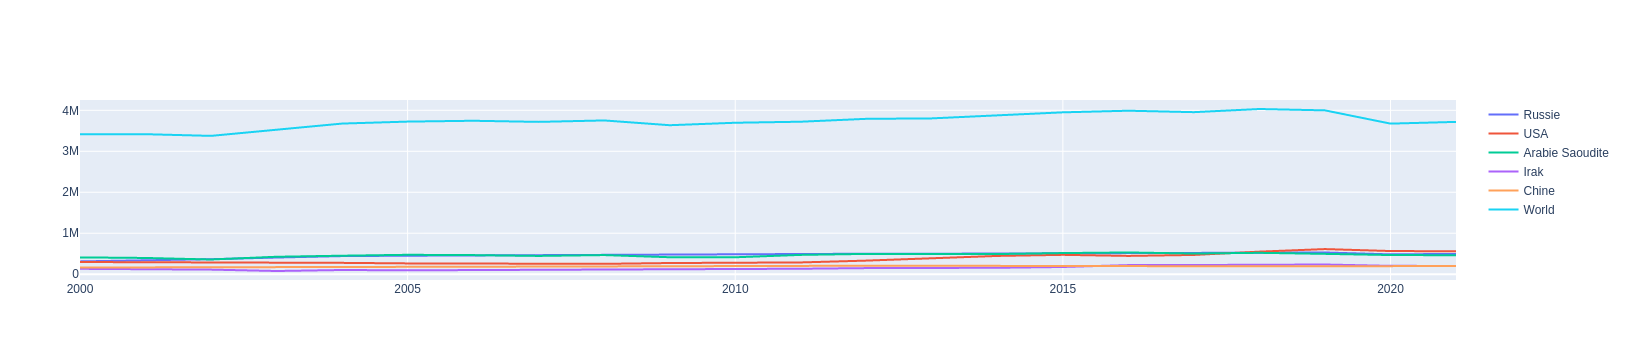

In [38]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=data_prod_Rus["TIME"], y=data_prod_Rus['Value'],
                    mode='lines',
                    name='Russie'))
fig.add_trace(go.Scatter(x=data_prod_Usa["TIME"], y=data_prod_Usa['Value'],
                    mode='lines',
                    name='USA'))
fig.add_trace(go.Scatter(x=data_prod_Sau["TIME"], y=data_prod_Sau['Value'],
                    mode='lines',
                    name='Arabie Saoudite'))
fig.add_trace(go.Scatter(x=data_prod_Irq["TIME"], y=data_prod_Irq['Value'],
                    mode='lines',
                    name='Irak'))
fig.add_trace(go.Scatter(x=data_prod_Chn["TIME"], y=data_prod_Chn['Value'],
                    mode='lines',
                    name='Chine'))
fig.add_trace(go.Scatter(x=data_prod_Wld["TIME"], y=data_prod_Wld['Value'],
                    mode='lines',
                    name='World'))

fig.show()

In [39]:
data_prod_2021 = data_prod[data_prod["TIME"] == 2021]
data_prod_2021.rename(columns = {'LOCATION' : 'iso_alpha'}, inplace = True)
data_prod_2021

/tmp/ipykernel_5286/2547040287.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



iso_alpha INDICATOR SUBJECT MEASURE FREQUENCY  TIME        Value  \
21          AUS   OILPROD     TOT    KTOE         A  2021   15577.2718   
43          AUT   OILPROD     TOT    KTOE         A  2021     558.6789   
65          BEL   OILPROD     TOT    KTOE         A  2021       0.0000   
87          CAN   OILPROD     TOT    KTOE         A  2021  194358.0035   
109         CZE   OILPROD     TOT    KTOE         A  2021      85.2680   
...         ...       ...     ...     ...       ...   ...          ...   
3167        MDG   OILPROD     TOT    KTOE         A  2021       0.0000   
3189        RWA   OILPROD     TOT    KTOE         A  2021       0.0000   
3211        SWZ   OILPROD     TOT    KTOE         A  2021       0.0000   
3233        UGA   OILPROD     TOT    KTOE         A  2021       0.0000   
3255  EU27_2020   OILPROD     TOT    KTOE         A  2021   17624.0883   

     Flag Codes  
21          NaN  
43          NaN  
65          NaN  
87          NaN  
109         NaN  
...         ...  
3167        NaN  
3189        NaN  
3211        NaN  
3233        NaN  
3255        NaN  

[148 rows x 8 columns]

In [40]:
data_prod_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 21 to 3255
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso_alpha   148 non-null    object 
 1   INDICATOR   148 non-null    object 
 2   SUBJECT     148 non-null    object 
 3   MEASURE     148 non-null    object 
 4   FREQUENCY   148 non-null    object 
 5   TIME        148 non-null    int64  
 6   Value       147 non-null    float64
 7   Flag Codes  1 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [41]:
df = px.data.gapminder()
df = df[['country', 'continent', 'iso_alpha']].drop_duplicates()
df.head()

country continent iso_alpha
0   Afghanistan      Asia       AFG
12      Albania    Europe       ALB
24      Algeria    Africa       DZA
36       Angola    Africa       AGO
48    Argentina  Americas       ARG

In [42]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 1692
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    142 non-null    object
 1   continent  142 non-null    object
 2   iso_alpha  142 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [44]:
data_map = pd.merge(df, data_prod_2021, how='inner', left_on=['iso_alpha'], right_on=['iso_alpha'])
data_map.fillna(0, inplace = True)
data_map

country continent iso_alpha INDICATOR SUBJECT MEASURE FREQUENCY  \
0        Albania    Europe       ALB   OILPROD     TOT    KTOE         A   
1        Algeria    Africa       DZA   OILPROD     TOT    KTOE         A   
2         Angola    Africa       AGO   OILPROD     TOT    KTOE         A   
3      Argentina  Americas       ARG   OILPROD     TOT    KTOE         A   
4      Australia   Oceania       AUS   OILPROD     TOT    KTOE         A   
..           ...       ...       ...       ...     ...     ...       ...   
115    Venezuela  Americas       VEN   OILPROD     TOT    KTOE         A   
116      Vietnam      Asia       VNM   OILPROD     TOT    KTOE         A   
117  Yemen, Rep.      Asia       YEM   OILPROD     TOT    KTOE         A   
118       Zambia    Africa       ZMB   OILPROD     TOT    KTOE         A   
119     Zimbabwe    Africa       ZWE   OILPROD     TOT    KTOE         A   

     TIME       Value Flag Codes  
0    2021    712.4000          0  
1    2021  47507.6163          0  
2    2021  54447.0524          0  
3    2021  26521.3020          0  
4    2021  15577.2718          0  
..    ...         ...        ...  
115  2021  36652.0010          0  
116  2021   8428.1951          0  
117  2021   3302.7800          0  
118  2021      0.0000          0  
119  2021      0.0000          0  

[120 rows x 10 columns]

In [45]:
data_map['iso_alpha'].unique()

array(['ALB', 'DZA', 'AGO', 'ARG', 'AUS', 'AUT', 'BHR', 'BGD', 'BEL',
       'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'KHM', 'CMR', 'CAN',
       'CHL', 'CHN', 'COL', 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CUB',
       'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'ETH',
       'FIN', 'FRA', 'GAB', 'DEU', 'GHA', 'GRC', 'GTM', 'HTI', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KEN', 'KOR', 'KWT', 'LBN', 'LBY',
       'MDG', 'MYS', 'MEX', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM',
       'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NOR', 'OMN', 'PAK',
       'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RWA', 'SAU',
       'SEN', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SDN',
       'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 'TZA', 'THA', 'TGO', 'TTO',
       'TUN', 'TUR', 'UGA', 'GBR', 'USA', 'URY', 'VEN', 'VNM', 'YEM',
       'ZMB', 'ZWE'], dtype=object)

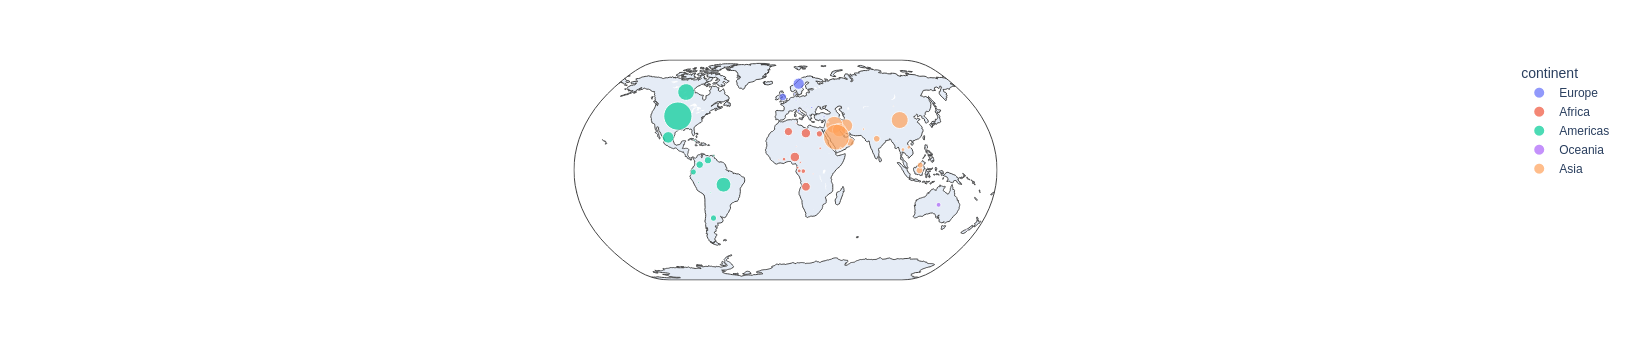

In [46]:
fig = px.scatter_geo(data_map, locations="iso_alpha", color="continent",
                     hover_name="country", size="Value",
                     projection="natural earth")
fig.show()

In [47]:
## garde seulement les valeurs supérieures à 0
data_prod_2021.drop(data_prod_2021[data_prod_2021['Value'] == 0].index, inplace = True)

/tmp/ipykernel_5286/2387117541.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
data_prod_2021['iso_alpha'].unique()

array(['AUS', 'AUT', 'CAN', 'CZE', 'DNK', 'FRA', 'DEU', 'GRC', 'HUN',
       'ITA', 'JPN', 'KOR', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'SVK',
       'ESP', 'TUR', 'GBR', 'USA', 'OEU', 'ALB', 'DZA', 'ARG', 'AZE',
       'BLR', 'BRA', 'BRN', 'BGR', 'CHL', 'CHN', 'COL', 'HRV', 'EGY',
       'GEO', 'GHA', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'LTU', 'MYS',
       'MDA', 'NGA', 'PAK', 'PER', 'PHL', 'ROU', 'RUS', 'SAU', 'SVN',
       'ZAF', 'SDN', 'TWN', 'THA', 'UKR', 'ARE', 'VNM', 'WLD', 'SRB',
       'EU28', 'G20', 'AGO', 'BHR', 'BOL', 'CMR', 'COG', 'CIV', 'CUB',
       'COD', 'ECU', 'GAB', 'GTM', 'IRQ', 'JOR', 'KWT', 'KGZ', 'LBY',
       'MNG', 'MAR', 'MMR', 'NER', 'OMN', 'QAT', 'SYR', 'TJK', 'TTO',
       'TUN', 'TKM', 'UZB', 'VEN', 'YEM', 'GNQ', 'EU27_2020'],
      dtype=object)

In [49]:
liste_pays = ['G20', 'WLD']

In [50]:
data_prod_sel = data_prod_2021[~data_prod_2021['iso_alpha'].isin(liste_pays)].sort_values('Value', ascending=False)[:20]
data_prod_sel

iso_alpha INDICATOR SUBJECT MEASURE FREQUENCY  TIME        Value  \
659        USA   OILPROD     TOT    KTOE         A  2021  559454.6637   
1627       RUS   OILPROD     TOT    KTOE         A  2021  495676.8175   
1649       SAU   OILPROD     TOT    KTOE         A  2021  463617.8124   
2463       IRQ   OILPROD     TOT    KTOE         A  2021  202630.6027   
989        CHN   OILPROD     TOT    KTOE         A  2021  199263.7650   
87         CAN   OILPROD     TOT    KTOE         A  2021  194358.0035   
879        BRA   OILPROD     TOT    KTOE         A  2021  150384.8446   
681        OEU   OILPROD     TOT    KTOE         A  2021  146686.3254   
1847       ARE   OILPROD     TOT    KTOE         A  2021  135697.9198   
2551       KWT   OILPROD     TOT    KTOE         A  2021  125701.3790   
1275       IRN   OILPROD     TOT    KTOE         A  2021  121734.4797   
395        MEX   OILPROD     TOT    KTOE         A  2021   93927.6050   
461        NOR   OILPROD     TOT    KTOE         A  2021   89614.4541   
1319       KAZ   OILPROD     TOT    KTOE         A  2021   85811.0997   
1495       NGA   OILPROD     TOT    KTOE         A  2021   64337.9637   
2617       LBY   OILPROD     TOT    KTOE         A  2021   62175.7909   
2001      EU28   OILPROD     TOT    KTOE         A  2021   57235.6435   
2045       AGO   OILPROD     TOT    KTOE         A  2021   54447.0524   
2793       OMN   OILPROD     TOT    KTOE         A  2021   48464.5089   
725        DZA   OILPROD     TOT    KTOE         A  2021   47507.6163   

     Flag Codes  
659         NaN  
1627        NaN  
1649        NaN  
2463        NaN  
989         NaN  
87          NaN  
879         NaN  
681         NaN  
1847        NaN  
2551        NaN  
1275        NaN  
395         NaN  
461         NaN  
1319        NaN  
1495        NaN  
2617        NaN  
2001        NaN  
2045        NaN  
2793        NaN  
725         NaN

In [77]:
def BubbleCloud(df, labels, values, label_highlight = None):
    n_colors = len(df[labels])
    get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
    colours = get_colors(n_colors)
    plot_labels = [f'{i} \n({str(j)} ktep)' for i,j in zip(df[labels], 
                                                    df[values])]
    circle_plot = circlify.circlify(df[values].tolist(), 
                               target_enclosure=circlify.Circle(x=0, y=0))

    # Note that circle_plot starts from the smallest to the largest, 
    # so we have to reverse the list
    circle_plot.reverse()
    fig, axs = plt.subplots(figsize=(15, 15))
    # Find axis boundaries
    lim = max(max(abs(circle.x) + circle.r, 
              abs(circle.y) + circle.r,) 
          for circle in circle_plot)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    # Display circles.
    for circle, colour, label in zip(circle_plot, colours, plot_labels):
        x, y, r = circle
        axs.add_patch(plt.Circle((x, y), r, linewidth=1, color = colour,
                             edgecolor='grey'))
        if label_highlight in label:
            plt.annotate(label, (x, y), color = 'black', fontsize = r*75, va='center', ha='center', fontweight='bold')
        else:
            plt.annotate(label, (x, y), color = 'white', fontsize = r*75, va='center', ha='center', fontweight='bold')
    plt.axis('off')
    plt.title('Production de pétrole en 2021', fontsize = 30)
    plt.show()

/tmp/ipykernel_5286/4050972788.py:23: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



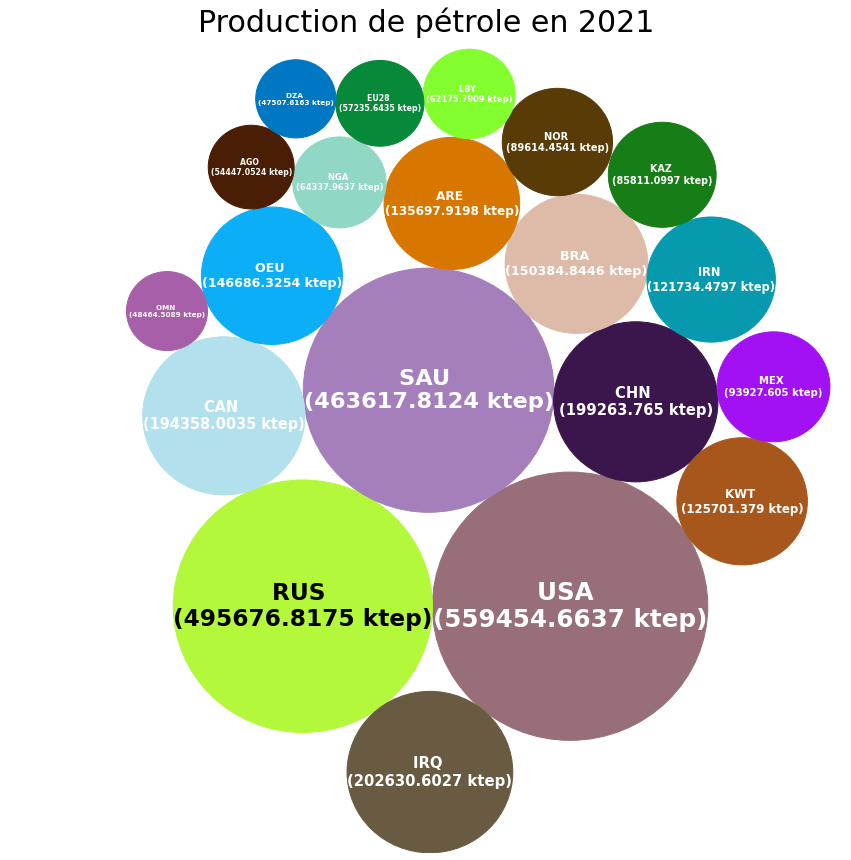

In [78]:
BubbleCloud(data_prod_sel, 'iso_alpha', 'Value', label_highlight = 'RUS')

/tmp/ipykernel_5286/3089096804.py:19: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



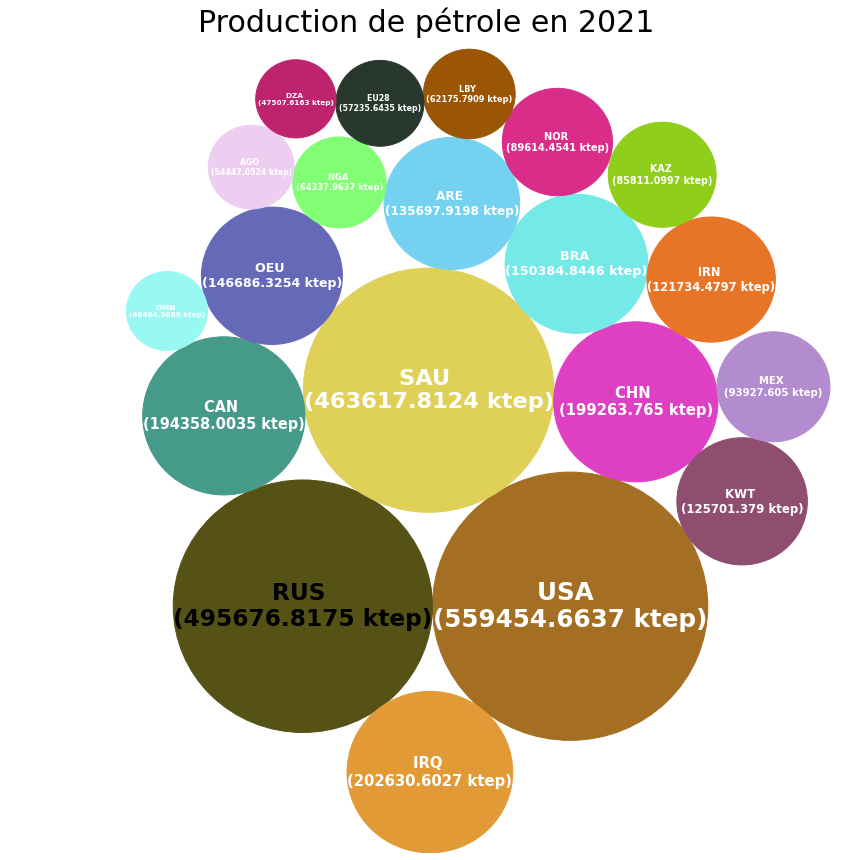

In [69]:

get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
colours = get_colors(20)
plot_labels = [f'{i} \n({str(j)} ktep)' for i,j in zip(data_prod_sel.iso_alpha, 
                                                    data_prod_sel.Value)]
circle_plot = circlify.circlify(data_prod_sel['Value'].tolist(), 
                               target_enclosure=circlify.Circle(x=0, y=0))

# Note that circle_plot starts from the smallest to the largest, 
# so we have to reverse the list
circle_plot.reverse()
fig, axs = plt.subplots(figsize=(15, 15))
# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r, 
              abs(circle.y) + circle.r,) 
          for circle in circle_plot)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
# Display circles.
for circle, colour, label in zip(circle_plot, colours, plot_labels):
    x, y, r = circle
    axs.add_patch(plt.Circle((x, y), r, linewidth=1, color = colour,
                             edgecolor='grey'))
    if 'RUS' in label:
        plt.annotate(label, (x, y), color = 'black', fontsize = r*75, va='center', ha='center', fontweight='bold')
    else:
        plt.annotate(label, (x, y), color = 'white', fontsize = r*75, va='center', ha='center', fontweight='bold')
plt.axis('off')
plt.title('Production de pétrole en 2021', fontsize = 30)
plt.show()

### Prix à l'import

In [64]:
data_prix_imp = pd.read_csv('../Data/Prix_import_France.csv', sep = ',')
data_prix_imp_Fra =  data_prix_imp[(data_prix_imp["LOCATION"] == 'FRA') & (data_prix_imp["TIME"] > 2017)]
data_prix_imp_Fra["DATETIME"] =  pd.to_datetime(data_prix_imp_Fra["TIME"], format = '%Y')
data_prix_imp_Fra

/tmp/ipykernel_5286/2244126976.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LOCATION    INDICATOR SUBJECT  MEASURE FREQUENCY  TIME   Value Flag Codes  \
179      FRA  OILIMPPRICE     TOT  USD_BAR         A  2018   71.59        NaN   
180      FRA  OILIMPPRICE     TOT  USD_BAR         A  2019   64.98        NaN   
181      FRA  OILIMPPRICE     TOT  USD_BAR         A  2020   44.04        NaN   
182      FRA  OILIMPPRICE     TOT  USD_BAR         A  2021   71.70        NaN   
183      FRA  OILIMPPRICE     TOT  USD_BAR         A  2022  105.06        NaN   

      DATETIME  
179 2018-01-01  
180 2019-01-01  
181 2020-01-01  
182 2021-01-01  
183 2022-01-01

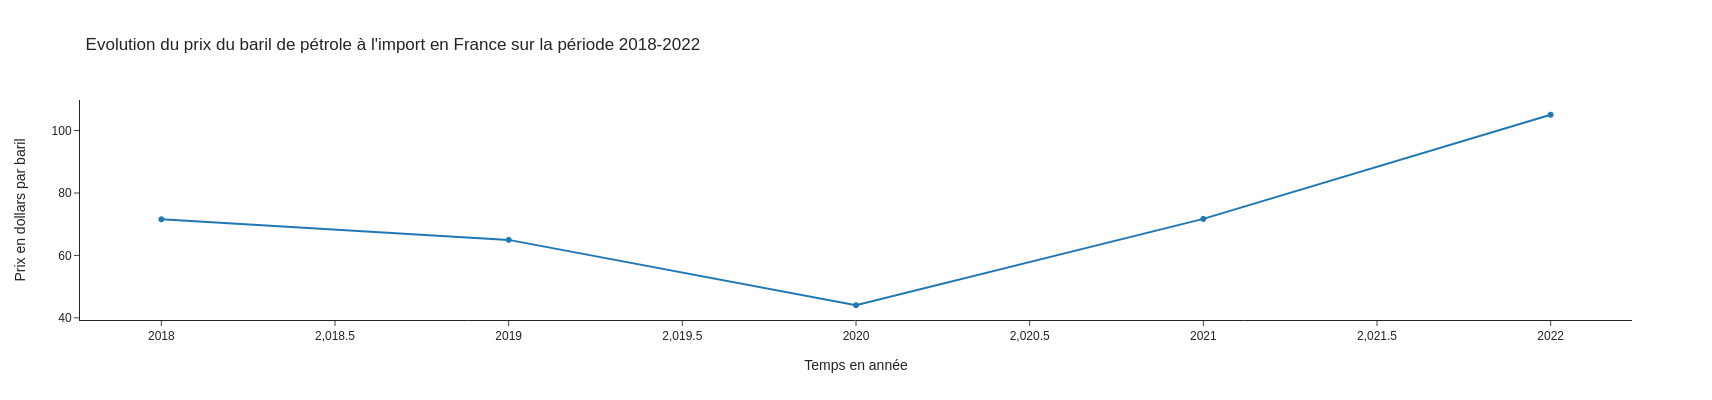

In [65]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=df_list[1].index, y=df_list[1]["Prix au détail de 100 kWh PCI de FOL TBTS"].astype(float), name='Prix FOL TBTS'))
fig.add_trace(go.Scatter(x=data_prix_imp_Fra['TIME'], y=data_prix_imp_Fra['Value'], name="Prix du baril de pétrole à l'import en France"))
fig.update_layout(title_text="Evolution du prix du baril de pétrole à l'import en France sur la période 2018-2022", legend_title_text = "Légende :", width=800, height=400, template='simple_white')
fig.update_xaxes(title_text='Temps en année')
fig.update_yaxes(title_text='Prix en dollars par baril')
fig.show()

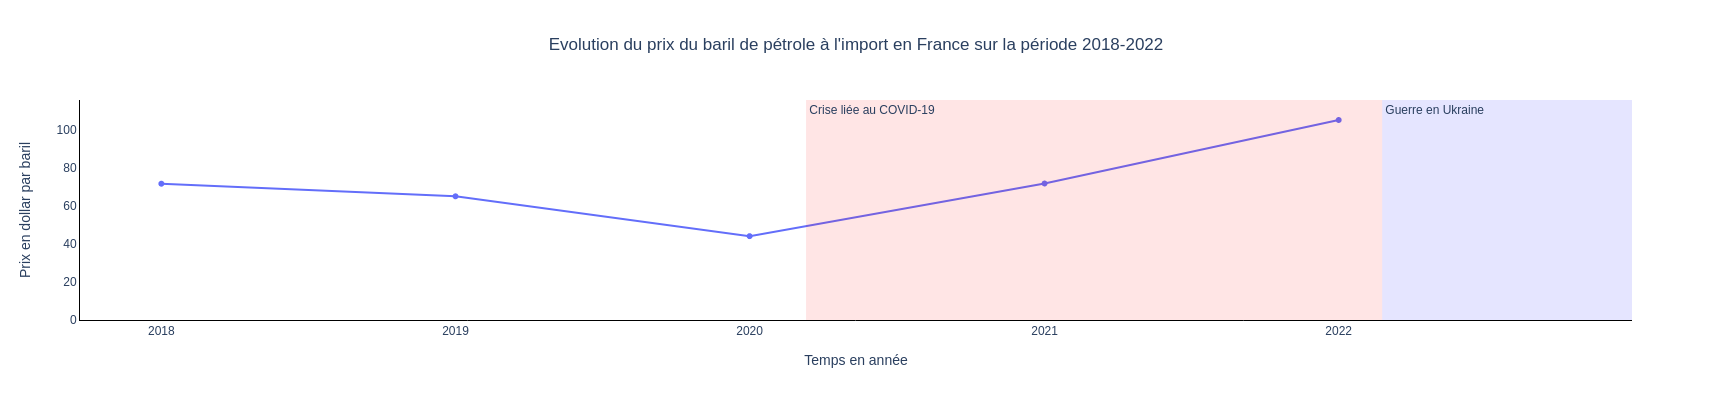

In [66]:
scatter_plot_2lines(x1 = data_prix_imp_Fra['DATETIME'], y1 = data_prix_imp_Fra['Value'], label_1 = "Prix du baril de pétrole à l'import en France", x_label = 'Temps en année',
                    y_label = 'Prix en dollar par baril', title = "Evolution du prix du baril de pétrole à l'import en France sur la période 2018-2022")